## DATASET & DATALOADERS
主要是做資料前處理相關的範例，pytorch相關的主要類別有以下兩個：
* torch.utils.data.Dataset
* torch.utils.data.DataLoader
DataLoader是Dataset的包裝，用來迭代的拿到Dataset裡面的資料

### Loading a Dataset
我們這裡用 Fashion-MNIST dataset, Fashion-MNIST有60000 training examples 與 10000個test examples.
每個圖片都是28x28pixel 的黑白影像，共有十個不同的類別
讀取FashionMNIST Dataset有以下幾個主要的參數
* **root**
* **train**
* **download=True**
* **transform** and **target_transform**

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform=ToTensor()
)

testing_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

100.0%

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


111.0%

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw


100.0%

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw


159.1%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!


### Iterating and Visualizing the Dataset

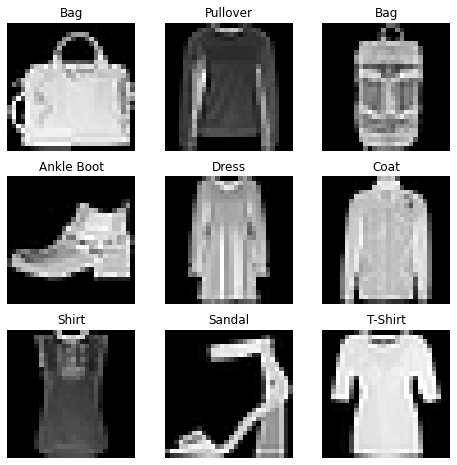

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize = (8, 8))
cols, rows = 3, 3
#randomly 選9個並且show出來
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()